In [ ]:
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

BASIC IMAGE MANIPULATION

In [ ]:
# Open an image in python
image = io.imread('quadrat_photos_raw/20240530_164149.jpg')
print(image)


In [ ]:
# Make a lightened version of that image by multiplying its RGB values
darkened_image = image * .5
plt.imshow(darkened_image)

In [ ]:
# Make an overlay on top of the image.
# Make a red image.
image[10:500, 10:500, :] = [255, 0, 0] # parameters of [] are x, y, z pixel ranges
plt.imshow(image)

In [ ]:
# Make a random image that's 500 by 500 pixels. All pixels will be randomized. 
random_pic = np.random.random([500, 500])

# Display that image using matplotlib
plt.imshow(random_pic)

how to pillow library 

In [ ]:
img = Image.open('quadrat_photos_raw/20240531_103859.jpg')

# Print image type
print(type(img)) # Note that it's not a numpy array. It needs to be converted if you want to do numpy stuff.

# img.show() # Open the image in a separate window.
print(img.format) # print the format of the image (JPEG)

img1 = np.asarray(img) # Convert a pillow image to a numpy array
print(type(img1)) # Show datatype of new image, which is a numpy array

Matplotlib & Pyplot image opening

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
# Import an image as a numpy array
img = mpimg.imread('quadrat_photos_raw/20240531_103859.jpg')
print(type(img))
plt.imshow(img) # remember to use imshow for numpy arrays

Scikit image library

In [ ]:
from skimage import io # For reading in images
from skimage import io, img_as_float, img_as_ubyte

# Import image as a numpy array
img = io.imread('quadrat_photos_raw/20240531_103859.jpg') # Import image as a numpy array
print(type(img))
plt.imshow(img)

# Import image as a float. It converts pixel values into a number from 0-1.
img_float = img_as_float(img)
# img_float = io.imread('quadrat_photos/20240531_103859.jpg').astype(np.float) # alternate method
print(img_float)

Open CV

In [ ]:

import cv2 # import command for open cv


In [ ]:
img = cv2.imread('quadrat_photos_raw/20240531_103859.jpg', 1) # read in image (1 means in color, 0 means in monochrome)
plt.imshow(img) # show image. Notice how the colors are off. cv2's default is not RGB. It's BGR.

# Try using open cv methods of showing images.
gray_img = cv2.imread('quadrat_photos_raw/20240531_103859.jpg', 0)
color_img = cv2.imread('quadrat_photos_raw/20240531_103859.jpg', 1)

# Import it but convert the images from BGR to RGB
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))

cv2.imshow('Gray Image', gray_img)
cv2.imshow('Color Image', color_img)

cv2.waitKey(0) # Keep the output window until you kill it (unless you put in 0 - that makes you able to close it manually)
cv2.destroyAllWindows() # Destroys all the windows that show up 

Reading all images

In [ ]:
import cv2
import glob

The * in the path designates which files the for loop will search through. Rad! Be warned, it will show every image in succession.

In [ ]:
path = 'quadrat_photos_raw/*.jpg'

# Loop through every file in the quadrat_photos folder and do operations on every one.
for file in glob.glob(path):
    print(file)
    a = cv2.imread(file)
    print(a)

    # Convert to RGB
    c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    # Show image
    cv2.imshow('Color Image', c)

    # Clean up windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()


IMAGE PROCESSING WITH PILLOW

In [2]:
from PIL import Image

Resizing

In [13]:
# Open the image. It is not a numpy array.
img = Image.open('quadrat_photos_raw/436552676_1025526125801177_8782775392322481521_n.jpg')

print(img.size) # Print the size - (width, height)

# Resize the image. It does an unexciting squish. Doesn't keep the aspect ratio. Bad thing
# small_img = img.resize((200, 300)) # make a copy that's smaller
# small_img.save('quadrat_photos_edited/test_small_image.jpg') # Save the image

small_img = img

# Resize but keep the aspect ratio. Better method.
small_img.thumbnail((510, 287))
small_img.save('quadrat_photos_edited/test_small_image_aspect_ratio.jpg') # Save the image

# You can't resize an image to be bigger than it is.


(2040, 1148)


Cropping

In [19]:
cropped_img = img.crop((0, 0, 300, 300)) # crop image to a square
cropped_img.save('quadrat_photos_edited/test_cropped_image.jpg')

# Put a cropped version of one image on top of another (no workie. But doesn't rlly matter)
img1 = Image.open('quadrat_photos_raw/441870424_993834382360394_2048396322547840220_n.jpg')
img2 = Image.open('quadrat_photos_raw/441575503_1505677643398773_3256282308229328881_n.jpg')

# Crop one image to make it smaller
img2 = img2.crop((10, 10, 20, 20))

# Copy image into another variable
img1_copy = img1.copy()
# Paste image 2 onto img1 @ the location 50, 50
img1_copy.paste(img2, (50, 50)) 
img1_copy.save('quadrat_photos_edited/test_bad_photoshop.jpg')

Rotation

In [21]:
img90_deg_rotated = img.rotate(90, expand = True) 
img90_deg_rotated.save('quadrat_photos_edited/rotated_90.jpg')

# expand = True means it expands the bounds of the image to accomodate the rotation


IMAGE PROCESSING WITH SCIPY

In [24]:
from skimage import io, img_as_ubyte
import numpy as np
from matplotlib import pyplot as plt

Scipy: load image, flip image, use color maps  
Documentation for all the available color maps: https://matplotlib.org/stable/gallery/color/colormap_reference.html

(1148, 2040) uint8
193


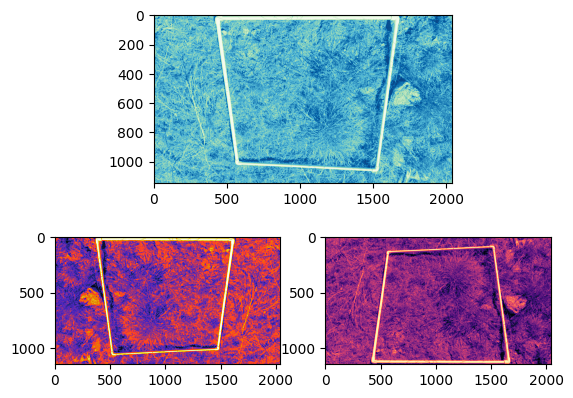

In [43]:
# Load in image as gray, then convert it back to ubyte
img = img_as_ubyte(io.imread('quadrat_photos_raw/441959955_1200760134272433_6935347568072997467_n.jpg', as_gray=True))

# Print image size and datatype.
print(img.shape, img.dtype) # (1148, 2040, 3), unsigned integer int
# print(img)

print(img[0,0]) # Prints RGB values of the pixel at [0,0]

# Flip images
flipped_lr = np.fliplr(img) # left to right
flipped_ud = np.flipud(img) # up to down

# Plot multiple images
plt.subplot(2,1,1) # (cols, rows, images)
plt.imshow(img, cmap = 'GnBu_r') # reversed GnBu
plt.subplot(2,2,3)
plt.imshow(flipped_lr, cmap = 'CMRmap')
plt.subplot(2,2,4)
plt.imshow(flipped_ud, cmap = 'magma')

# If you want to apply gradient maps, use the cmap argument and take a map from https://matplotlib.org/stable/gallery/color/colormap_reference.html 
# In order to make it work properly, the images must be gray (see img_as_ubyte kerfluffle above)
# Reverse the gradient by appending '_r' to the name, like in the green blue one.



Scipy: rotate

In [45]:
from scipy import ndimage

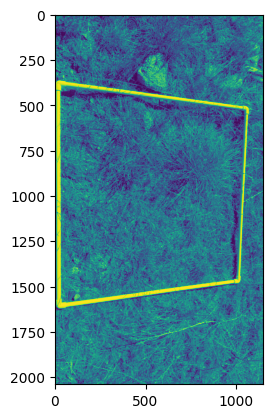

In [49]:

img = img_as_ubyte(io.imread('quadrat_photos_raw/441959955_1200760134272433_6935347568072997467_n.jpg', as_gray=True))

# Rotate image 90 degrees
rotated = ndimage.rotate(img, 90) # reshape argument will control cropping with rotation
plt.imshow(rotated) 


Scipy: filters  
Here's a list of all the filters u can use: https://docs.scipy.org/doc/scipy/reference/ndimage.html

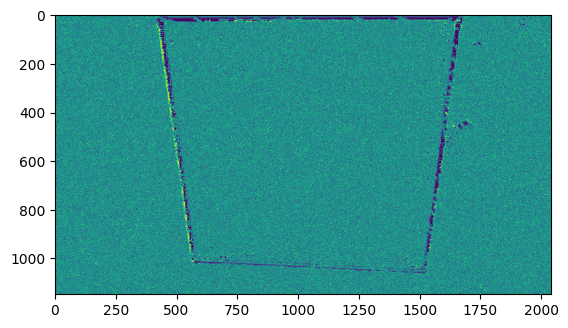

In [56]:
# DE-NOISING, SMOOTHING
# Uniform filter blurs the image.
uniform_filtered = ndimage.uniform_filter(img, size=3)
# Gaussian filter adds a gaussian blur. Doesn't preserve edges. 
gaussian_filtered = ndimage.gaussian_filter(img, sigma=3)
# De-noised but does preserve edges
median_filtered = ndimage.median_filter(img, 3)

# EDGE DETECTION
sobel_img = ndimage.sobel(img) # Looks like it picks up the quadrat well, and the rest is noise. Tinker with the axis argument to adjust. 

plt.imshow(sobel_img)

